<a href="https://colab.research.google.com/github/KillianCa/SQ_Minus_EQ_Aptitude_Tool/blob/main/fyp_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visulization for fyp data

importing required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loading data

In [ ]:
df = pd.read_excel("/content/survey_data_cleaned_and_prep.xlsx")

# Plotting SQ score distribution

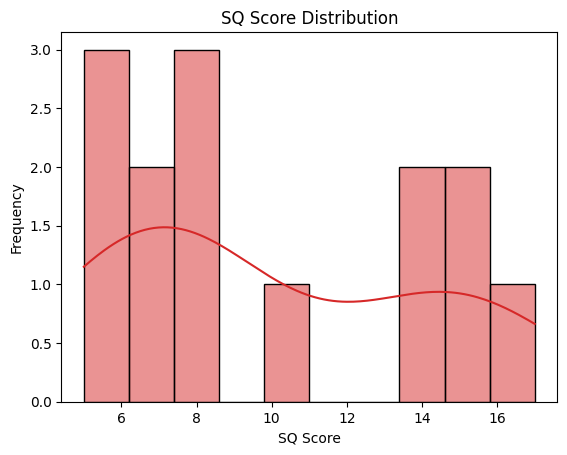

In [ ]:
sns.histplot(df["SQ score"], kde=True, bins=10, color="#D62828")
plt.xlabel("SQ Score")
plt.ylabel("Frequency")
plt.title("SQ Score Distribution")
plt.savefig("SQ_Score_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()



# Plotting EQ score distribution

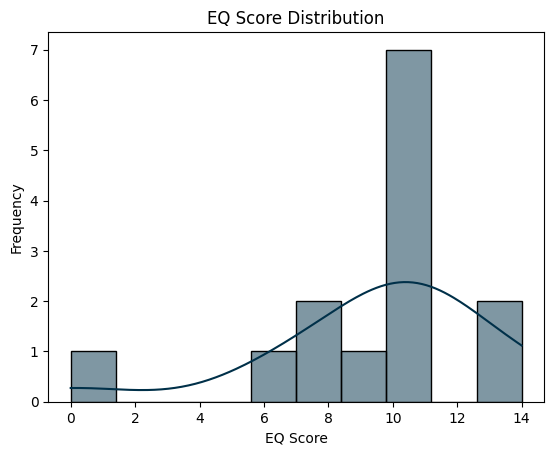

In [ ]:
sns.histplot(df["EQ score"], kde=True, bins=10, color="#003049")
plt.xlabel("EQ Score")
plt.ylabel("Frequency")
plt.title("EQ Score Distribution")
plt.savefig("EQ_Score_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()



# Plotting SQ - EQ distribution

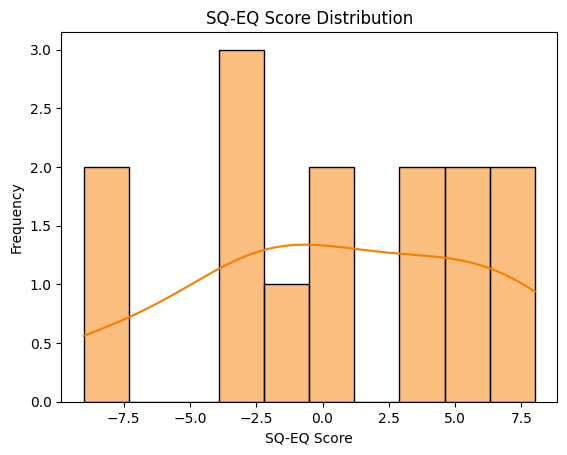

In [ ]:
sns.histplot(df["SQ-EQ"], kde=True, bins=10, color = "#F77F00")
plt.xlabel("SQ-EQ Score")
plt.ylabel("Frequency")
plt.title("SQ-EQ Score Distribution")
plt.savefig("SQ_Minus_EQ_Score_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Assuming df is your DataFrame
mean = df["SQ-EQ"].mean()
median = df["Grade_average"].median()
mode = df["Grade_average"].mode()[0]  # mode() returns a Series, so take the first mode
minimum = df["Grade_average"].min()
maximum = df["Grade_average"].max()
std_dev = df["Grade_average"].std()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Min: {minimum:.2f}")
print(f"Max: {maximum:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


Mean: 0.43
Median: 72.00
Mode: 80.00
Min: 41.00
Max: 80.00
Standard Deviation: 12.10


# Plotting Grade Average Distribution

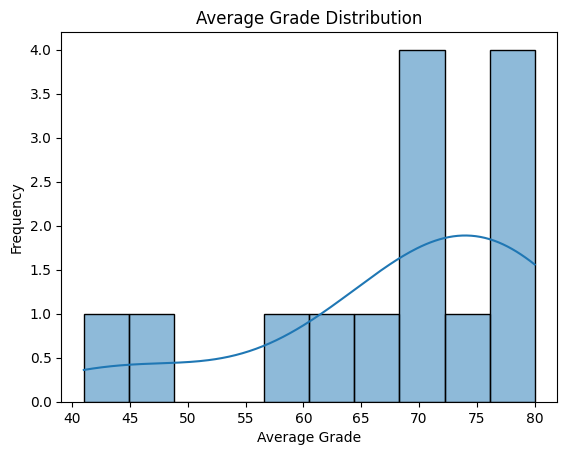

In [ ]:
sns.histplot(df["Grade_average"], kde=True, bins=10)
plt.xlabel("Average Grade")
plt.ylabel("Frequency")
plt.title("Average Grade Distribution")
plt.show()

# Plotting all Grades


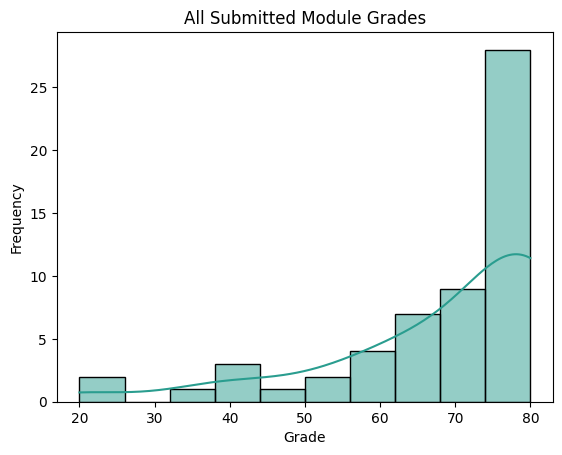

In [ ]:
grade_columns = [col for col in df.columns if "Result in module" in col]
all_grades = pd.concat([df[col] for col in grade_columns])
all_grades = all_grades.dropna()

sns.histplot(all_grades, bins=10, kde=True, color="#2A9D8F")
plt.title("All Submitted Module Grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.savefig("All_Grades.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd

# Assuming df is your DataFrame
mean = df["Grade_average"].mean()
median = df["Grade_average"].median()
mode = df["Grade_average"].mode()[0]  # mode() returns a Series, so take the first mode
minimum = df["Grade_average"].min()
maximum = df["Grade_average"].max()
std_dev = df["Grade_average"].std()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Min: {minimum:.2f}")
print(f"Max: {maximum:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


Mean: 68.71
Median: 72.00
Mode: 80.00
Min: 41.00
Max: 80.00
Standard Deviation: 12.10


All Porgramming Languages Submitted

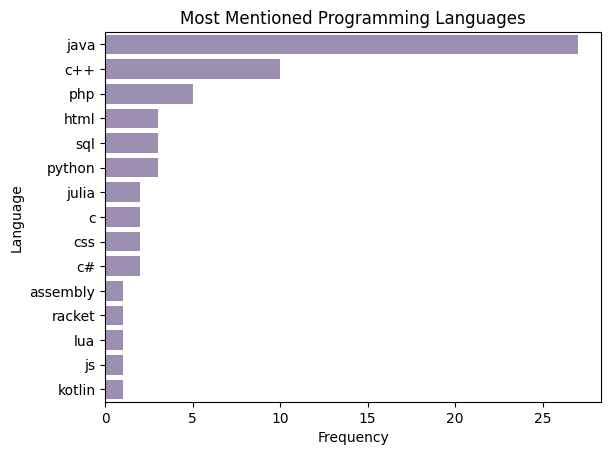

In [ ]:
language_columns = [col for col in df.columns if "Programming language examined" in col]

all_languages_raw = pd.concat([df[col] for col in language_columns], ignore_index=True)

all_languages_raw = all_languages_raw.dropna().astype(str)

split_languages = all_languages_raw.str.replace("/", ",").str.split(",")

flat_list = [lang.strip().lower() for sublist in split_languages for lang in sublist]

lang_series = pd.Series(flat_list)
lang_counts = lang_series.value_counts().sort_values(ascending=False)

sns.barplot(x=lang_counts.values, y=lang_counts.index, color = "#9C89B8")
plt.title("Most Mentioned Programming Languages")
plt.xlabel("Frequency")
plt.ylabel("Language")
plt.savefig("Programming_Languages.png", dpi=300, bbox_inches='tight')
plt.show()



# Plotting Relationship Between EQ and Programming Results

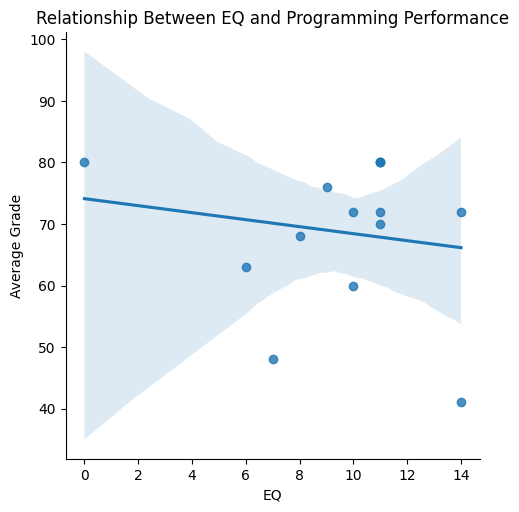

In [ ]:
sns.lmplot(data=df, x="EQ score", y="Grade_average")
plt.title("Relationship Between EQ and Programming Performance")
plt.xlabel("EQ")
plt.ylabel("Average Grade")
plt.show()

# Plotting Relationship Between EQ and Programming Results

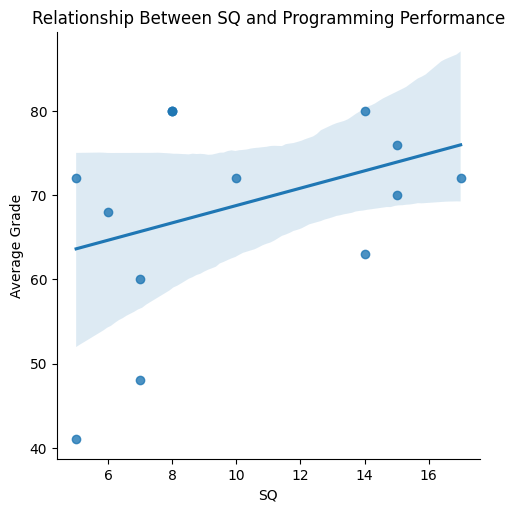

In [ ]:
sns.lmplot(data=df, x="SQ score", y="Grade_average")
plt.title("Relationship Between SQ and Programming Performance")
plt.xlabel("SQ")
plt.ylabel("Average Grade")
plt.show()

# Plotting Relationship Between SQ-EQ and Programming Results

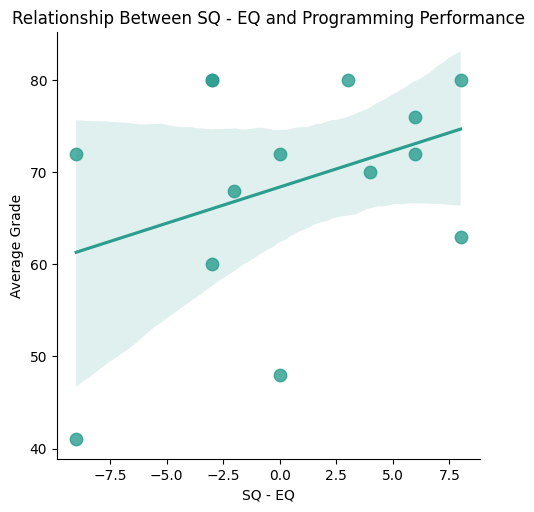

In [ ]:
sns.lmplot(data=df, x="SQ-EQ", y="Grade_average", line_kws={"color": "#2A9D8F"},scatter_kws={"color": "#2A9D8F", "s": 80} )
plt.title("Relationship Between SQ - EQ and Programming Performance")
plt.xlabel("SQ - EQ")
plt.ylabel("Average Grade")
plt.savefig("SQ_Minus_EQ_Vs_Grade.png", dpi=300, bbox_inches='tight')
plt.show()



# Correlation heatmap

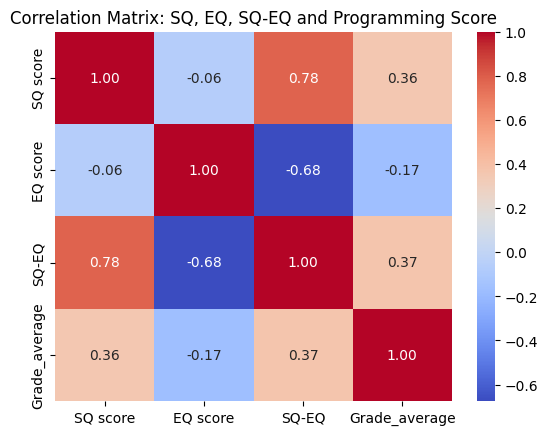

In [ ]:
corr_vars = ["SQ score", "EQ score", "SQ-EQ", "Grade_average"]

correlation_matrix = df[corr_vars].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: SQ, EQ, SQ-EQ and Programming Score")
plt.show()

In [ ]:
cols = ["SQ score", "EQ score", "SQ-EQ"]
summary_stats = df[cols].agg(["min", "mean", "max"]).round(2)
print(summary_stats)


      SQ score  EQ score  SQ-EQ
min       5.00       0.0  -9.00
mean      9.93       9.5   0.43
max      17.00      14.0   8.00
